In [1]:
#加工なしデータ×vgg-19モデル×Adam

In [4]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import japanize_matplotlib
from torchviz import make_dot
from torchinfo import summary
from IPython.display import display
from tqdm.notebook import tqdm
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [5]:
device = torch.device("cpu")
print(device)

cpu


In [6]:
!git clone https://github.com/makaishi2/pythonlibs.git

from pythonlibs.torch_lib1 import *

print(README)

fatal: destination path 'pythonlibs' already exists and is not an empty directory.
Common Library for PyTorch
Author: M. Akaishi


In [7]:
!tree 加工なし画像

加工なし画像
├── test
│   ├── endo
│   │   ├── endo36.JPG
│   │   ├── endo37.JPG
│   │   ├── endo38.JPG
│   │   ├── endo39.JPG
│   │   ├── endo40.JPG
│   │   ├── endo41.JPG
│   │   ├── endo42.JPG
│   │   ├── endo43.JPG
│   │   ├── endo44.JPG
│   │   ├── endo45.JPG
│   │   ├── endo46.JPG
│   │   ├── endo47.JPG
│   │   ├── endo48.JPG
│   │   ├── endo49.JPG
│   │   └── endo50.JPG
│   ├── kaki
│   │   ├── kaki36.JPG
│   │   ├── kaki37.JPG
│   │   ├── kaki38.JPG
│   │   ├── kaki39.JPG
│   │   ├── kaki40.JPG
│   │   ├── kaki41.JPG
│   │   ├── kaki42.JPG
│   │   ├── kaki43.JPG
│   │   ├── kaki44.JPG
│   │   ├── kaki45.JPG
│   │   ├── kaki46.JPG
│   │   ├── kaki47.JPG
│   │   ├── kaki48.JPG
│   │   ├── kaki49.JPG
│   │   └── kaki50.JPG
│   ├── kubo
│   │   ├── kubo36.JPG
│   │   ├── kubo37.JPG
│   │   ├── kubo38.JPG
│   │   ├── kubo39.JPG
│   │   ├── kubo40.JPG
│   │   ├── kubo41.JPG
│   │   ├── kubo42.JPG
│   │   ├── kubo43.JPG
│   │   ├── kubo44.JPG
│   │   ├── kubo45.JPG
│   │   ├── kubo46.JPG
│ 

In [8]:
test_transform = transforms.Compose([transforms.Resize(224),transforms.CenterCrop(224),
                                     transforms.ToTensor(),transforms.Normalize(0.5, 0.5)])

train_transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),  transforms.Resize(224), transforms.CenterCrop(224),
                                      transforms.ToTensor(), transforms.Normalize(0.5, 0.5),
                                      transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)])

In [9]:
data_dir='加工なし画像'

import os
train_dir=os.path.join(data_dir,'train')
test_dir=os.path.join(data_dir,'test')

classes=['endo','kaki','kubo','nagi','yama']

train_data=datasets.ImageFolder(train_dir,transform=train_transform)
train_data2=datasets.ImageFolder(train_dir,transform=test_transform)
test_data=datasets.ImageFolder(test_dir,transform=test_transform)

In [10]:
print(f' 学習データ:{len(train_data)}件')
print(f' 検証データ:{len(test_data)}件')

 学習データ:175件
 検証データ:75件


In [11]:
batch_size=10

train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)

train_loader2=DataLoader(train_data2,batch_size=175,shuffle=True)

test_loader=DataLoader(test_data,batch_size=batch_size, shuffle=False)

test_loader2=DataLoader(test_data,batch_size=75,shuffle=True)

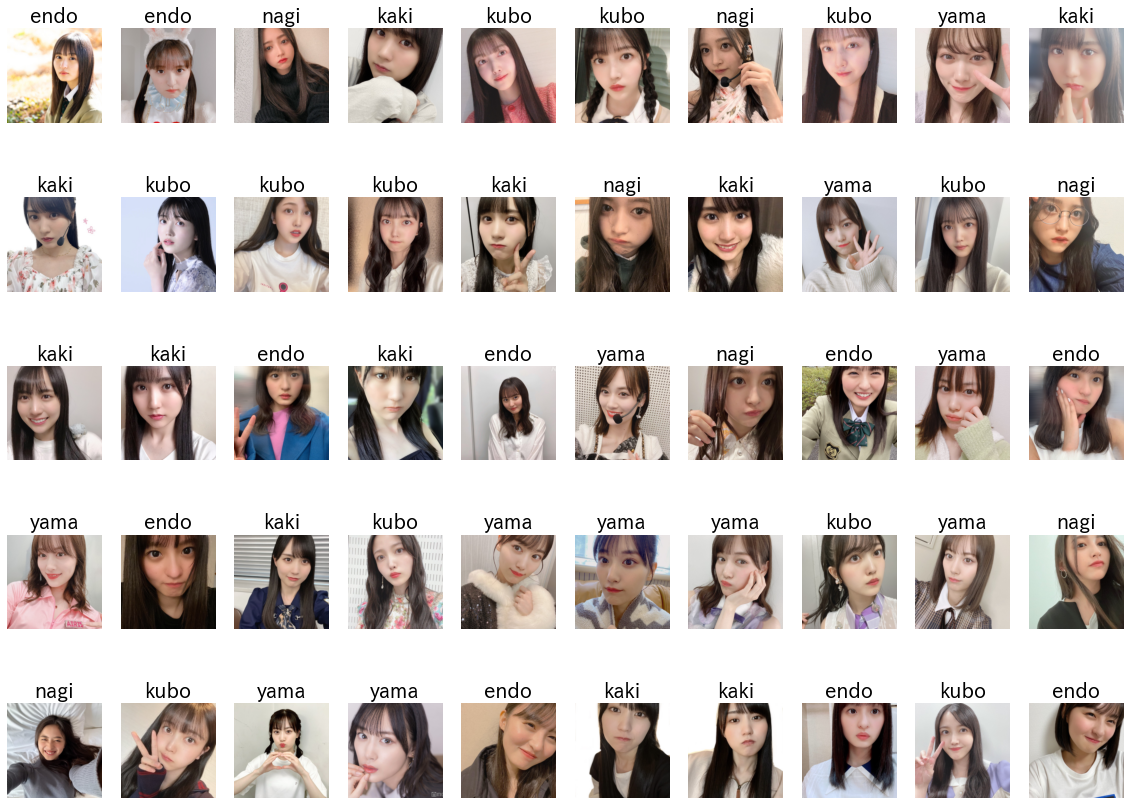

In [12]:
torch_seed()
show_images_labels(train_loader2,classes,None,None)

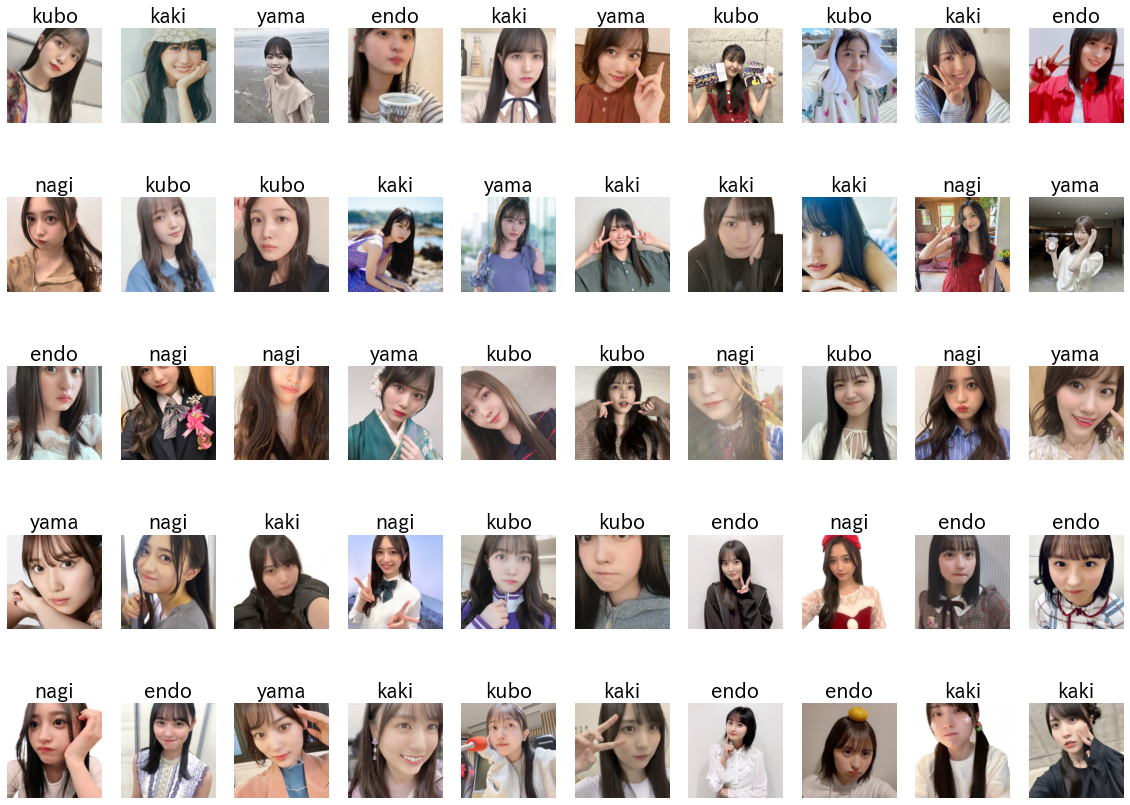

In [13]:
torch_seed()

show_images_labels(test_loader2, classes, None, None)

In [14]:
from torchvision import models
net=models.vgg19_bn(pretrained=True)

for param in net.parameters():
    param.requires_grad=False

torch_seed()

in_features=net.classifier[6].in_features
net.classifier[6]=torch.nn.Linear(in_features, 5)

net.avgpool=torch.nn.Identity()

net=net.to(device)

lr=0.001

criterion=torch.nn.CrossEntropyLoss()

optimizer=optim.Adam(net.classifier[6].parameters())

history = np.zeros((0, 5))

/Users/shige/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shige/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
num_epochs=30

history=fit(net,optimizer,criterion,num_epochs,train_loader,test_loader,device,history)

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [1/30], loss: 1.66145 acc: 0.24571 val_loss: 1.54279, val_acc: 0.33333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [2/30], loss: 1.26540 acc: 0.51429 val_loss: 1.43252, val_acc: 0.36000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [3/30], loss: 1.11423 acc: 0.53143 val_loss: 1.42771, val_acc: 0.48000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [4/30], loss: 0.98376 acc: 0.62286 val_loss: 1.35172, val_acc: 0.44000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [5/30], loss: 0.92903 acc: 0.66857 val_loss: 1.34976, val_acc: 0.48000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [6/30], loss: 0.85729 acc: 0.65714 val_loss: 1.31428, val_acc: 0.46667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [7/30], loss: 0.74933 acc: 0.73143 val_loss: 1.29303, val_acc: 0.53333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [8/30], loss: 0.79568 acc: 0.69714 val_loss: 1.33349, val_acc: 0.50667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [9/30], loss: 0.67029 acc: 0.78286 val_loss: 1.32620, val_acc: 0.52000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [10/30], loss: 0.74685 acc: 0.68000 val_loss: 1.40410, val_acc: 0.44000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [11/30], loss: 0.79754 acc: 0.72000 val_loss: 1.48066, val_acc: 0.44000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [12/30], loss: 0.80574 acc: 0.66857 val_loss: 1.36737, val_acc: 0.45333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [13/30], loss: 0.57256 acc: 0.80571 val_loss: 1.32459, val_acc: 0.54667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [14/30], loss: 0.59052 acc: 0.82857 val_loss: 1.32284, val_acc: 0.52000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [15/30], loss: 0.61588 acc: 0.78286 val_loss: 1.41320, val_acc: 0.54667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [16/30], loss: 0.67209 acc: 0.74857 val_loss: 1.41500, val_acc: 0.53333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [17/30], loss: 0.60238 acc: 0.77714 val_loss: 1.36757, val_acc: 0.46667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [18/30], loss: 0.53359 acc: 0.81714 val_loss: 1.34402, val_acc: 0.56000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [19/30], loss: 0.49320 acc: 0.84571 val_loss: 1.36472, val_acc: 0.53333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [20/30], loss: 0.63184 acc: 0.75429 val_loss: 1.39626, val_acc: 0.56000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [21/30], loss: 0.52245 acc: 0.81714 val_loss: 1.34495, val_acc: 0.54667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [22/30], loss: 0.55594 acc: 0.81143 val_loss: 1.38568, val_acc: 0.54667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [23/30], loss: 0.50840 acc: 0.81714 val_loss: 1.37754, val_acc: 0.46667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [24/30], loss: 0.59280 acc: 0.75429 val_loss: 1.39420, val_acc: 0.52000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [25/30], loss: 0.56048 acc: 0.81143 val_loss: 1.36992, val_acc: 0.46667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [26/30], loss: 0.39787 acc: 0.85714 val_loss: 1.36436, val_acc: 0.52000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [27/30], loss: 0.53385 acc: 0.81714 val_loss: 1.36901, val_acc: 0.52000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [28/30], loss: 0.40876 acc: 0.84571 val_loss: 1.40377, val_acc: 0.56000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [29/30], loss: 0.59526 acc: 0.80571 val_loss: 1.44506, val_acc: 0.50667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [30/30], loss: 0.52613 acc: 0.82286 val_loss: 1.45239, val_acc: 0.54667


初期状態: 損失: 1.54279 精度: 0.33333
最終状態: 損失: 1.45239 精度: 0.54667


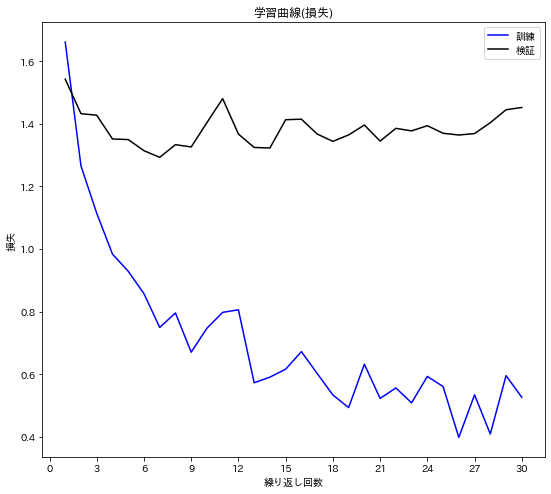

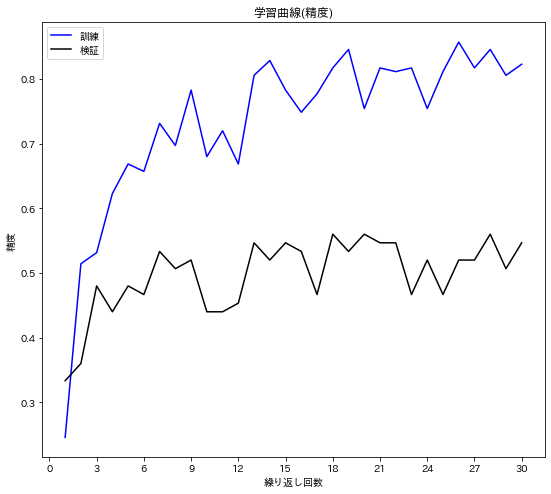

In [16]:
evaluate_history(history)

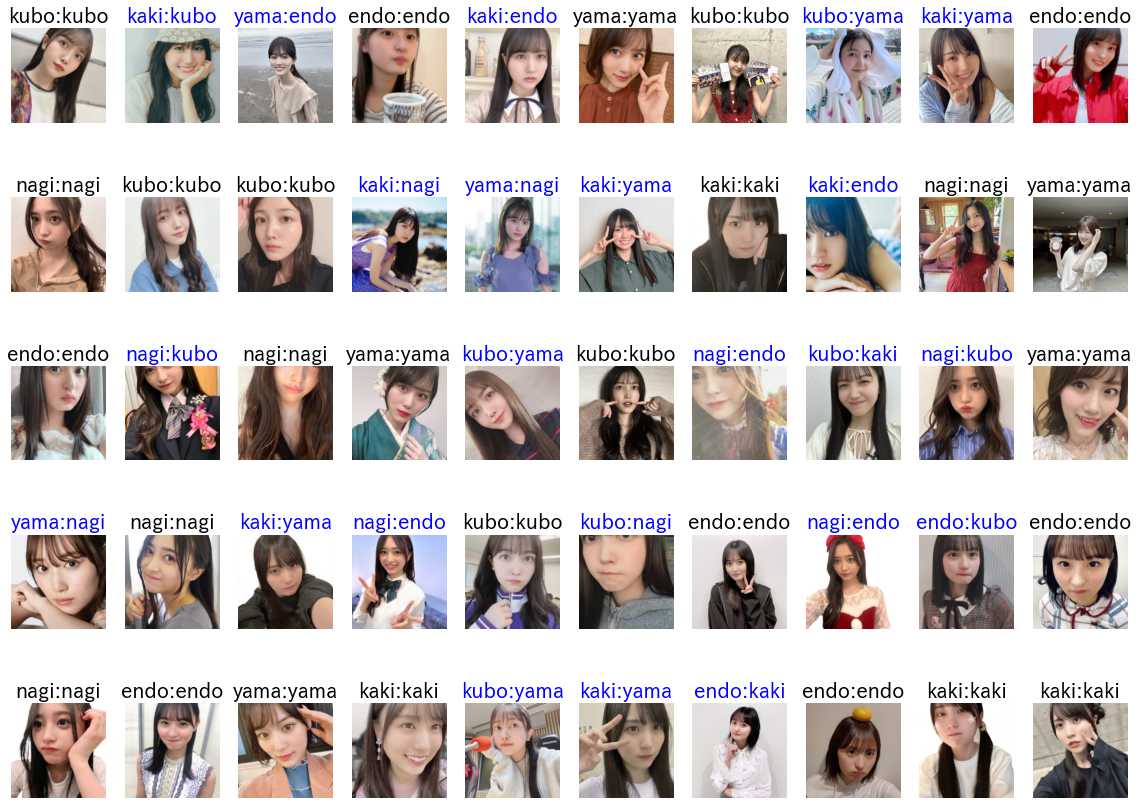

In [17]:
torch_seed()

show_images_labels(test_loader2,classes,net,device)